## Problem Statement
A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

For this, they want to understand the factors on which the demand for these shared bikes depends.
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

## We would be following the below steps in order to build our model
* EDA
    * Understanding the data
    * Data Cleaning
    * Visualizing the data
* Data Preparation
    * Create Dummy variables
* Splitting the data in test/train
* Rescaling the features
* Build Model
* Residual analysis on train data
* Make Prediction on Test data
* Check Hypothesis
* Evaluate Model

In [21]:
##importing the required libraries
import pandas as pd
import numpy as np

##importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##importing the pandas profiling package
import pandas_profiling
from pandas_profiling import ProfileReport

##importing the machine learning related libraries
import sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Importing RFE and RFECV and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the dataset

In [22]:
##reading the dataset
bike_data=pd.read_csv("./day.csv")

In [23]:
##Check the data
bike_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [24]:
# describe the data of the numerical columns
bike_data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [25]:
##check the columns
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [26]:
##shape of the data
bike_data.shape

(730, 16)

In [27]:
## check for missing values in columns
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [28]:
## check for missing values in rows
bike_data.isnull().sum(axis=1).value_counts()

0    730
dtype: int64

#### We can see that there are no missing values either in rows or in columns

## Data Cleaning

In [29]:
##dropping the 'instant' column as this is just the serial number
bike_data.drop('instant', axis=1, inplace=True)

##### Since we won't use 'casual' and 'registered' columns dropping those as well
##### Also, dteday column feature are available as subsets in *yr* and *mnth* column hence we can drop that too

In [30]:
redundant_columns=['casual', 'registered', 'dteday']
bike_data.drop(redundant_columns, axis=1, inplace=True)

In [31]:
##checking the data after dropping the data
bike_data.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

#### Checking the data after cleaning the data

In [32]:
## checking data type of all columns
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [33]:
## checking for duplicate values
##creating a copy
bike_2 = bike_data

# Checking for duplicates and dropping it
bike_2.drop_duplicates(inplace=True)
bike_2.shape

(730, 12)

In [34]:
## looking at the original dataframe
bike_data.shape

(730, 12)

#### Since both the dataframe has the same shape, hence there are no duplicate values

#### Let's check the datatype of each feature and segregate whether it's a categorical variable or not

In [35]:
##checking the info of the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


###### From the data dictionary provided we know the following are categorical variables
* __season__ , __mnth__ , __weekday__ , __weathersit__

##### Looking at the dataset we know that the numerical variables are as follows

* __cnt__, __temp__, __atemp__, __hum__,__windspeed__

Here __cnt__ is our dependent variable

#### Let's look at the other remaining variables

In [36]:
## Checking year variable
bike_data.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [37]:
## checking holiday variable
bike_data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [38]:
## checking workingday variable
bike_data.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

##### From the above analysis we can say that the remaining variables are binary variables

* __yr__, __holiday__, __workingday__

## Visualizing the data (Univariate/Bivariate/MultiVariate Analysis)

In [39]:
##segregating the categorical variables and numerical variables
a=['cnt', 'temp', 'atemp', 'hum','windspeed']
bik_data_categorical_predictors=bike_data.drop(a, axis=1)
bik_data_numerical_predictors=bike_data[['temp', 'atemp', 'hum','windspeed']]

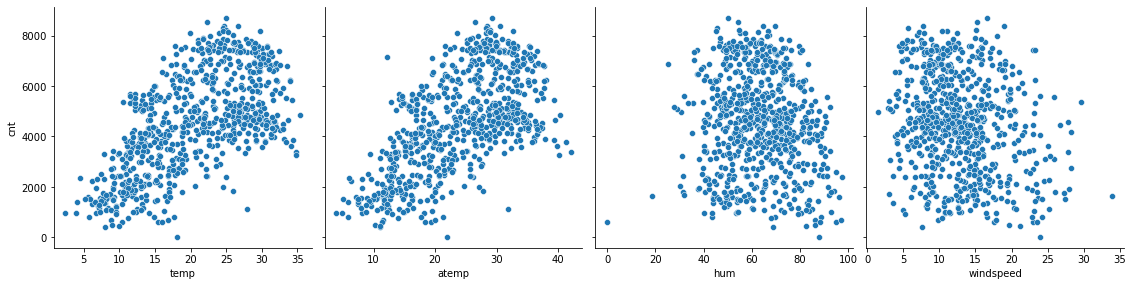

In [40]:
## plotting scatter plot for all numerical variable
sns.pairplot(bike_data, x_vars=bik_data_numerical_predictors, y_vars='cnt',height=4)
plt.show()

##### We see *temp* and *atemp* are highly corelated with cnt

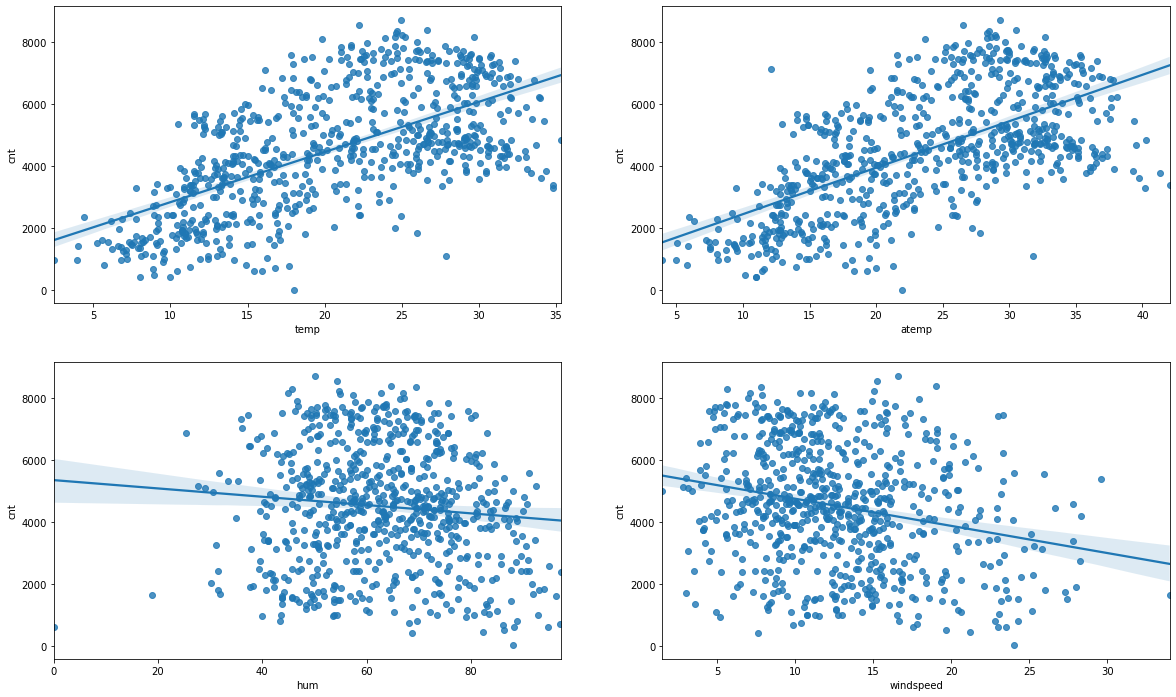

In [41]:
## plotting reg plot for numerical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.regplot(data=bike_data, x='temp', y='cnt',scatter=True, fit_reg=True)
plt.subplot(2,2,2)
sns.regplot(data=bike_data, x='atemp', y='cnt',scatter=True, fit_reg=True)
plt.subplot(2,2,3)
sns.regplot(data=bike_data, x='hum', y='cnt',scatter=True, fit_reg=True)
plt.subplot(2,2,4)
sns.regplot(data=bike_data, x='windspeed', y='cnt',scatter=True, fit_reg=True)
plt.show()

##### We see that the datapoint for windspeed are scattered a lot and there is no pattern

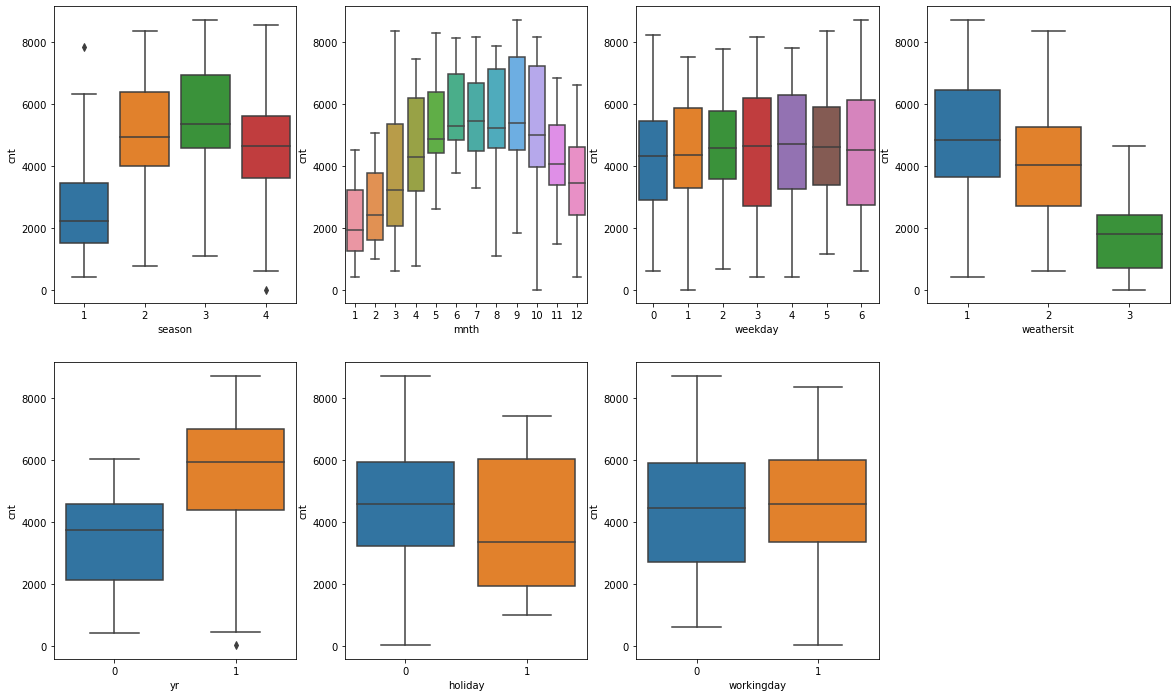

In [42]:
## plotting box plot for categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

#### We don't see any outliers in the data

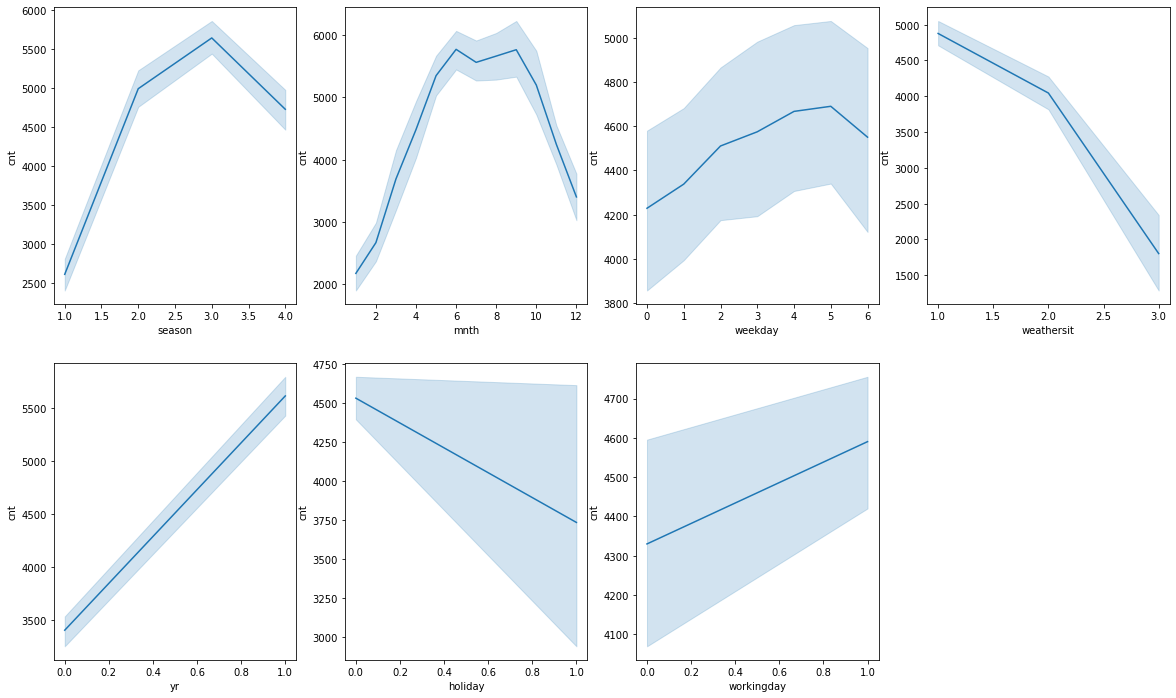

In [43]:
## plotting line plot for categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.lineplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.lineplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.lineplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.lineplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.lineplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.lineplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.lineplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

##### We see that yr is highly corelated positive while weathersit is negatively corelated

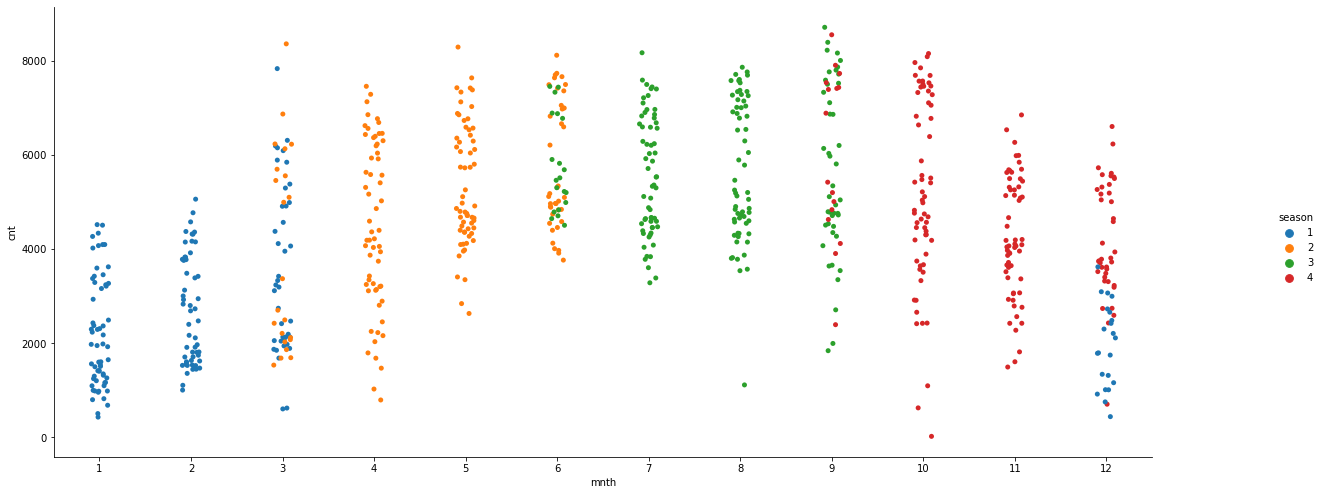

In [44]:
## plotting cat plot for categorical variables
g=sns.catplot(x = 'mnth', y = 'cnt', hue='season', data = bike_data)
g.fig.set_size_inches(20,7)

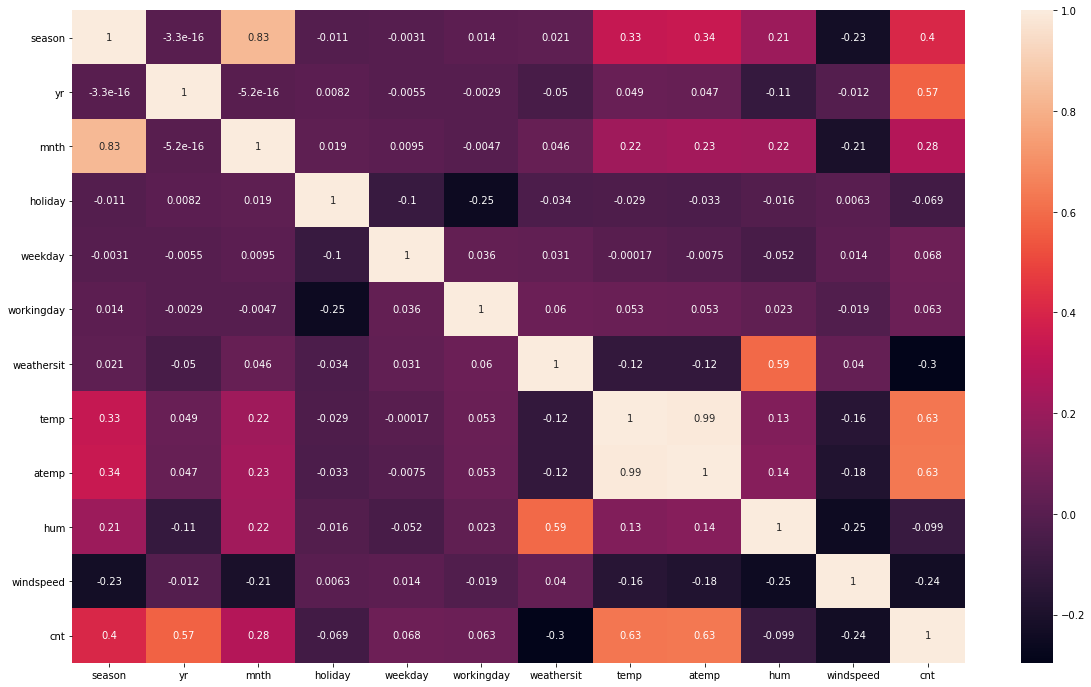

In [45]:
plt.figure(figsize=(20, 12))
sns.heatmap(bike_data.corr(), annot=True)
plt.show()

##### We can see that cnt is corelated with season, yr, temp,mnth, weathersit

In [46]:
## Generating a report on the data using pandas profiling
profile = ProfileReport(bike_data, title="EDA for Bike Data")

In [47]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preparation

In [48]:
## Create Dummy variables for categorical variables
months=pd.get_dummies(bike_data['mnth'],drop_first = True)
days=pd.get_dummies(bike_data['weekday'],drop_first = True)

In [49]:
months

2   3   4   5   6   7   8   9   10  11  12
0     0   0   0   0   0   0   0   0   0   0   0
1     0   0   0   0   0   0   0   0   0   0   0
2     0   0   0   0   0   0   0   0   0   0   0
3     0   0   0   0   0   0   0   0   0   0   0
4     0   0   0   0   0   0   0   0   0   0   0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
725   0   0   0   0   0   0   0   0   0   0   1
726   0   0   0   0   0   0   0   0   0   0   1
727   0   0   0   0   0   0   0   0   0   0   1
728   0   0   0   0   0   0   0   0   0   0   1
729   0   0   0   0   0   0   0   0   0   0   1

[730 rows x 11 columns]

In [50]:
days

1  2  3  4  5  6
0    0  0  0  0  0  1
1    0  0  0  0  0  0
2    1  0  0  0  0  0
3    0  1  0  0  0  0
4    0  0  1  0  0  0
..  .. .. .. .. .. ..
725  0  0  0  1  0  0
726  0  0  0  0  1  0
727  0  0  0  0  0  1
728  0  0  0  0  0  0
729  1  0  0  0  0  0

[730 rows x 6 columns]

#### Since the columns are becoming more or less similar let's give some meaningful names to the columns by using map function

In [51]:
## Mapping the days name to weekday column, by looking at the calendar and the data encoding used is as follows
#mon	6, tue	0, wed	1, thur	2, fri	3, sat	4, sun	5
weekday = bike_data.weekday.map({5:"Sun",6:"Mon",0:"Tue",1:"Wedn",2:"Thu", 3:"Fri",4:"Sat"})

In [52]:
weekday

0       Mon
1       Tue
2      Wedn
3       Thu
4       Fri
       ... 
725     Sat
726     Sun
727     Mon
728     Tue
729    Wedn
Name: weekday, Length: 730, dtype: object

In [53]:
## assigning the value back to the columns
bike_data['weekday']=weekday

In [54]:
## checking the dataset
bike_data.head()

season  yr  mnth  holiday weekday  workingday  weathersit       temp  \
0       1   0     1        0     Mon           0           2  14.110847   
1       1   0     1        0     Tue           0           2  14.902598   
2       1   0     1        0    Wedn           1           1   8.050924   
3       1   0     1        0     Thu           1           1   8.200000   
4       1   0     1        0     Fri           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [55]:
## changing weathersit according to data dictionary
bike_data.weathersit = bike_data.weathersit.map({1:"Clear",2:"Mist",3:"Light_Snow",4:"Heavy_Rain"})

In [56]:
## changing season variable
bike_data.season=bike_data.season.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})

In [57]:
## changing the month variable
bike_data.mnth=bike_data.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May", 6:"Jun",7:"Jul", 8:"Aug", 9:"Sep", 10: "Oct", 11:"Nov", 12:"Dec"})

In [58]:
##looking at the dataset after changing the variables
bike_data.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0     Mon           0       Mist  14.110847   
1  Spring   0  Jan        0     Tue           0       Mist  14.902598   
2  Spring   0  Jan        0    Wedn           1      Clear   8.050924   
3  Spring   0  Jan        0     Thu           1      Clear   8.200000   
4  Spring   0  Jan        0     Fri           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [59]:
##Creating dummy variables now
months=pd.get_dummies(bike_data['mnth'],drop_first = True)
days=pd.get_dummies(bike_data['weekday'],drop_first = True)
seasons=pd.get_dummies(bike_data['season'],drop_first = True)
weather=pd.get_dummies(bike_data['weathersit'],drop_first = True)

In [60]:
##Concatenating the values to the original dataframe
bike_data = pd.concat([bike_data, months, days, seasons, weather], axis = 1)

In [61]:
bike_data.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0     Mon           0       Mist  14.110847   
1  Spring   0  Jan        0     Tue           0       Mist  14.902598   
2  Spring   0  Jan        0    Wedn           1      Clear   8.050924   
3  Spring   0  Jan        0     Thu           1      Clear   8.200000   
4  Spring   0  Jan        0     Fri           1      Clear   9.305237   

      atemp      hum  ...  Sat  Sun  Thu  Tue  Wedn  Spring  Summer  Winter  \
0  18.18125  80.5833  ...    0    0    0    0     0       1       0       0   
1  17.68695  69.6087  ...    0    0    0    1     0       1       0       0   
2   9.47025  43.7273  ...    0    0    0    0     1       1       0       0   
3  10.60610  59.0435  ...    0    0    1    0     0       1       0       0   
4  11.46350  43.6957  ...    0    0    0    0     0       1       0       0   

   Light_Snow  Mist  
0           0     1  
1           0     1  
2           0     0  
3           0     0  
4           0     0  

[5 rows x 34 columns]

In [62]:
## dropping the original categorical columns
ctg=['season', 'weathersit', 'mnth', 'weekday']
bike_data.drop(ctg, axis=1, inplace=True)

In [63]:
bike_data

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0     0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1     0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350  43.6957  12.522300  1600   
..   ..      ...         ...        ...       ...      ...        ...   ...   
725   1        0           1  10.420847  11.33210  65.2917  23.458911  2114   
726   1        0           1  10.386653  12.75230  59.0000  10.416557  3095   
727   1        0           0  10.386653  12.12000  75.2917   8.333661  1341   
728   1        0           0  10.489153  11.58500  48.3333  23.500518  1796   
729   1        0           1   8.849153  11.17435  57.7500  10.374682  2729   

     Aug  Dec  ...  Sat  Sun  Thu  Tue  Wedn  Spring  Summer  Winter  \
0      0    0  ...    0    0    0    0     0       1       0       0   
1      0    0  ...    0    0    0    1     0       1       0       0   
2      0    0  ...    0    0    0    0     1       1       0       0   
3      0    0  ...    0    0    1    0     0       1       0       0   
4      0    0  ...    0    0    0    0     0       1       0       0   
..   ...  ...  ...  ...  ...  ...  ...   ...     ...     ...     ...   
725    0    1  ...    1    0    0    0     0       1       0       0   
726    0    1  ...    0    1    0    0     0       1       0       0   
727    0    1  ...    0    0    0    0     0       1       0       0   
728    0    1  ...    0    0    0    1     0       1       0       0   
729    0    1  ...    0    0    0    0     1       1       0       0   

     Light_Snow  Mist  
0             0     1  
1             0     1  
2             0     0  
3             0     0  
4             0     0  
..          ...   ...  
725           0     1  
726           0     1  
727           0     1  
728           0     0  
729           0     1  

[730 rows x 30 columns]

## Splitting the data in train/test dataset

In [64]:
## Dividing the dataset into train and test dataset
np.random.seed(0)
train, test = train_test_split(bike_data, train_size = 0.70, test_size = 0.30, random_state = 100)

In [65]:
## checking the shape of the training data
train.shape

(510, 30)

In [66]:
## checking the shape of the testing data
test.shape

(219, 30)

## Rescaling the Features
###### Since all the features are not on the same scale, hence we would be rescaling using the existing binaries to bring all dataset into the same scale
* We would scale only numerical variables, binary variables scaling is not required. although we can do that but we will loose interpretation
#### We would be using min-max scaling

In [67]:
## train data before rescaling
train[['temp', 'atemp', 'hum','windspeed','cnt']]

temp     atemp      hum  windspeed   cnt
653  19.201653  23.04230  55.8333  12.208807  7534
576  29.246653  33.14480  70.4167  11.083475  7216
426  16.980847  20.67460  62.1250  10.792293  4066
728  10.489153  11.58500  48.3333  23.500518  1796
482  15.443347  18.87520  48.9583   8.708325  4220
..         ...       ...      ...        ...   ...
526  29.554153  32.98605  58.7917  13.916771  6664
578  30.852500  35.35440  65.9583   8.666718  7261
53    9.091299  12.28585  42.3043   6.305571  1917
350  10.591653  12.46855  56.0833  16.292189  2739
79   17.647835  20.48675  73.7391  19.348461  2077

[510 rows x 5 columns]

In [68]:
## creating an object of the minmax class
rescale = MinMaxScaler()
## creating an array of numerical variables
num_columns=['temp', 'atemp', 'hum','windspeed', 'cnt']
## fitting and transforming the train data
train[num_columns]=rescale.fit_transform(train[num_columns])

In [69]:
## train data after scaling
train[['temp', 'atemp', 'hum','windspeed', 'cnt']]

temp     atemp       hum  windspeed       cnt
653  0.509887  0.501133  0.575354   0.300794  0.864243
576  0.815169  0.766351  0.725633   0.264686  0.827658
426  0.442393  0.438975  0.640189   0.255342  0.465255
728  0.245101  0.200348  0.498067   0.663106  0.204096
482  0.395666  0.391735  0.504508   0.188475  0.482973
..        ...       ...       ...        ...       ...
526  0.824514  0.762183  0.605840   0.355596  0.764151
578  0.863973  0.824359  0.679690   0.187140  0.832835
53   0.202618  0.218747  0.435939   0.111379  0.218017
350  0.248216  0.223544  0.577930   0.431816  0.312586
79   0.462664  0.434043  0.759870   0.529881  0.236424

[510 rows x 5 columns]

#### Similarly we will scale the test data as well

In [70]:
## test data before scaling
test[['temp', 'atemp', 'hum','windspeed', 'cnt']]

temp     atemp      hum  windspeed   cnt
184  29.793347  33.27085  63.7917   5.459106  6043
535  32.082500  36.04875  59.2083   7.625404  6211
299  19.270000  22.85230  81.2917  13.250121  2659
221  31.433347  34.24915  42.4167  13.417286  4780
152  29.315000  32.19710  30.5000  19.583229  4968
..         ...       ...      ...        ...   ...
400  10.899153  13.22605  68.7917  11.791732  2947
702  19.509153  23.45270  73.3750  11.666643  6606
127  21.661653  25.94665  63.1667   5.000712  4333
640  26.957500  29.95665  79.3750   4.458569  7572
72   13.333897  16.60000  49.6957   9.174042  2046

[219 rows x 5 columns]

In [71]:
## rescaling test data
test[num_columns]=rescale.transform(test[num_columns])

In [72]:
## test data after scaling
test[['temp', 'atemp', 'hum','windspeed', 'cnt']]

temp     atemp       hum  windspeed       cnt
184  0.831783  0.769660  0.657364   0.084219  0.692706
535  0.901354  0.842587  0.610133   0.153728  0.712034
299  0.511964  0.496145  0.837699   0.334206  0.303382
221  0.881625  0.795343  0.437098   0.339570  0.547400
152  0.817246  0.741471  0.314298   0.537414  0.569029
..        ...       ...       ...        ...       ...
400  0.257562  0.243430  0.708888   0.287411  0.336516
702  0.519232  0.511907  0.756118   0.283397  0.757478
127  0.584649  0.577380  0.650923   0.069510  0.495973
640  0.745598  0.682653  0.817947   0.052115  0.868615
72   0.331557  0.332005  0.512107   0.203418  0.232858

[219 rows x 5 columns]

#### Let's check the correlation of the numerical variables after rescaling


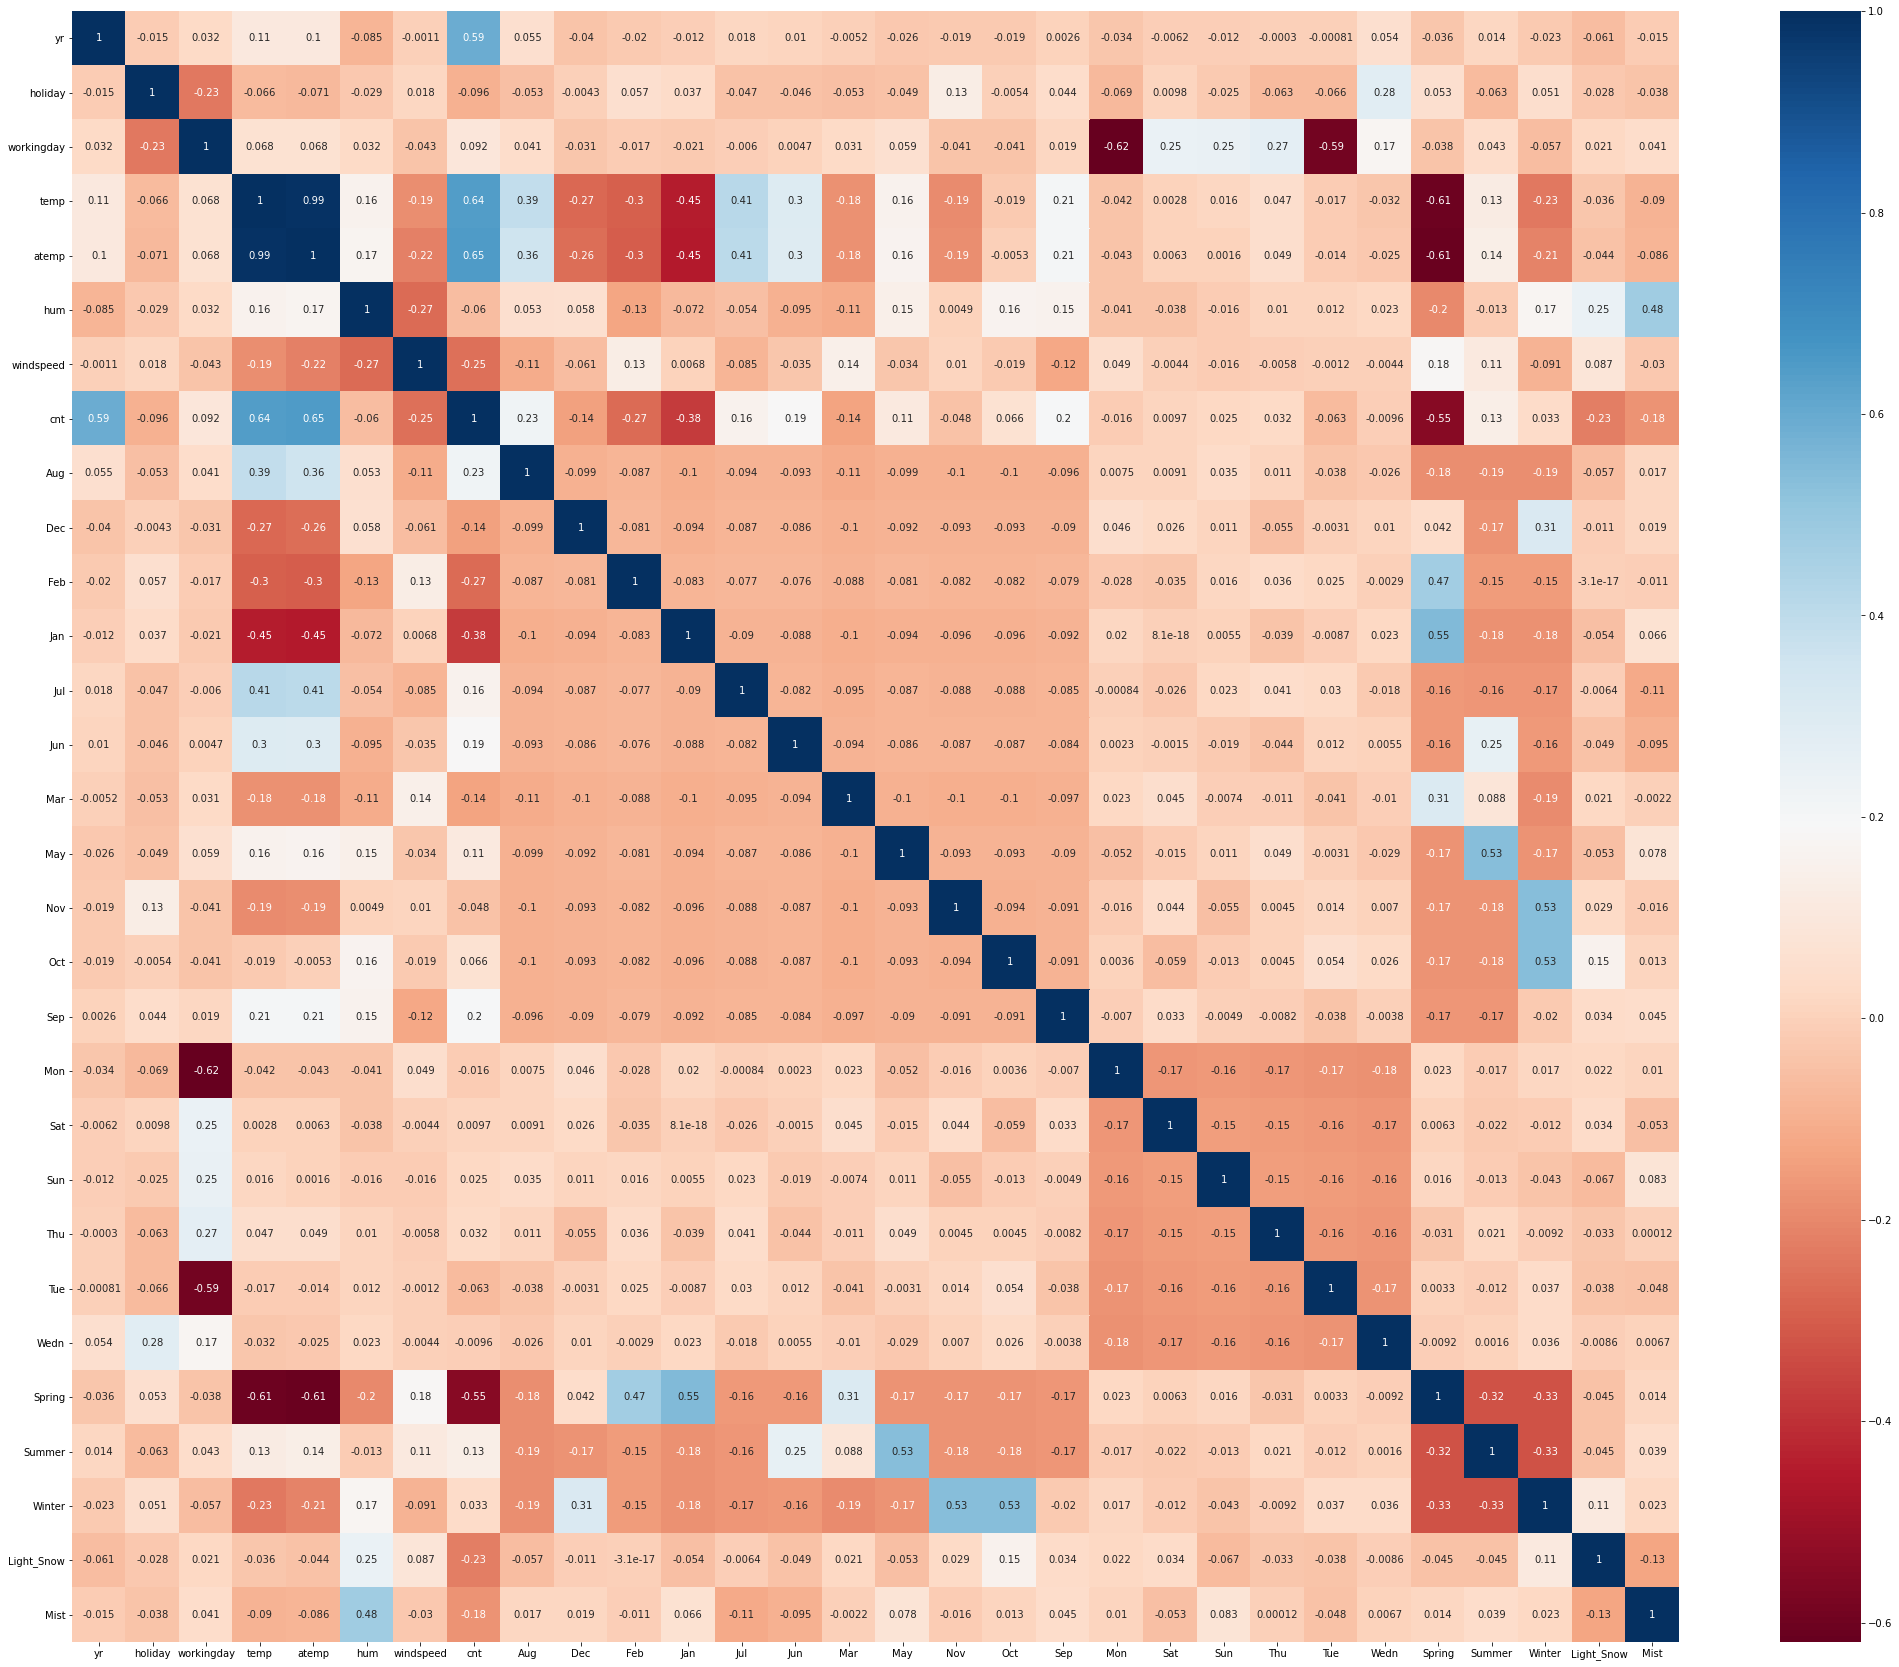

In [73]:
plt.figure(figsize=(36,30))
sns.heatmap(train.corr(), annot = True, cmap="RdBu")
plt.show()

## Dividing into X and y sets for the model building

In [74]:
## taking out cnt and assigning it to y_train
y_train = train.pop('cnt')
## assigning the rest features as X
X_train=train

## test data segregation
y_test = test.pop('cnt')
X_test=test

## Building the model

#### In order to run RFE we have to first fit the model

In [75]:
model1=LinearRegression()
model1.fit(X_train, y_train)
rfe=RFE(model1,13)  ## taking 13 columns as starting baseline
rfe = rfe.fit(X_train, y_train)

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 16),
 ('Mar', False, 17),
 ('May', False, 7),
 ('Nov', False, 4),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', False, 13),
 ('Thu', False, 12),
 ('Tue', False, 8),
 ('Wedn', False, 11),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [77]:
## columns selected by rfe
selected=X_train.columns[rfe.support_]

In [78]:
## columns dropped by rfe
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sat', 'Sun', 'Thu', 'Tue', 'Wedn'],
      dtype='object')

In [79]:
selected

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Jul', 'Sep', 'Mon',
       'Spring', 'Summer', 'Winter', 'Light_Snow', 'Mist'],
      dtype='object')

In [80]:
## creating new test set with selected columns
X_train_rfe=X_train[selected]

#### Building a MLR model using statsmodel


In [81]:
# adding a constant variable
X_train_rfe_1 = sm.add_constant(X_train_rfe)

In [82]:
##checking the train dataset
X_train_rfe_1

const  yr  holiday      temp       hum  windspeed  Jul  Sep  Mon  Spring  \
653    1.0   1        0  0.509887  0.575354   0.300794    0    0    0       0   
576    1.0   1        0  0.815169  0.725633   0.264686    1    0    0       0   
426    1.0   1        0  0.442393  0.640189   0.255342    0    0    1       1   
728    1.0   1        0  0.245101  0.498067   0.663106    0    0    0       1   
482    1.0   1        0  0.395666  0.504508   0.188475    0    0    1       0   
..     ...  ..      ...       ...       ...        ...  ...  ...  ...     ...   
526    1.0   1        0  0.824514  0.605840   0.355596    0    0    0       0   
578    1.0   1        0  0.863973  0.679690   0.187140    0    0    0       0   
53     1.0   0        0  0.202618  0.435939   0.111379    0    0    0       1   
350    1.0   0        0  0.248216  0.577930   0.431816    0    0    1       0   
79     1.0   0        0  0.462664  0.759870   0.529881    0    0    0       0   

     Summer  Winter  Light_Snow  Mist  
653       0       1           0     0  
576       0       0           0     0  
426       0       0           0     1  
728       0       0           0     0  
482       1       0           0     1  
..      ...     ...         ...   ...  
526       1       0           0     1  
578       0       0           0     0  
53        0       0           0     0  
350       0       1           0     1  
79        1       0           0     1  

[510 rows x 14 columns]

In [83]:
## creating the first model
mlr_1=sm.OLS(y_train,X_train_rfe_1).fit()

In [84]:
##checking params and summary
mlr_1.params

const         0.279640
yr            0.229791
holiday      -0.094469
temp          0.530609
hum          -0.168105
windspeed    -0.183143
Jul          -0.057853
Sep           0.082751
Mon           0.017490
Spring       -0.056290
Summer        0.052092
Winter        0.098387
Light_Snow   -0.239456
Mist         -0.054750
dtype: float64

In [85]:
mlr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          7.51e-190
Time:                        00:45:58   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2796      0.035      8.096      0.000       0.212       0.348
yr             0.2298      0.008     28.298      0.000       0.214       0.246
holiday       -0.0945      0.026     -3.690      0.000      -0.145      -0.044
temp           0.5306      0.034     15.779      0.000       0.465       0.597
hum           -0.1681      0.038     -4.450      0.000      -0.242      -0.094
windspeed     -0.1831      0.026     -7.120      0.000      -0.234      -0.133
Jul           -0.0579      0.018     -3.162      0.002      -0.094      -0.022
Sep            0.0828      0.017      4.952      0.000       0.050       0.116
Mon            0.0175      0.011      1.575      0.116      -0.004       0.039
Spring        -0.0563      0.021     -2.701      0.007      -0.097      -0.015
Summer         0.0521      0.015      3.472      0.001       0.023       0.082
Winter         0.0984      0.017      5.706      0.000       0.065       0.132
Light_Snow    -0.2395      0.026     -9.090      0.000      -0.291      -0.188
Mist          -0.0547      0.011     -5.211      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       63.307   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.410
Skew:                          -0.685   Prob(JB):                     1.45e-30
Kurtosis:                       5.143   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let's find out VIF, Also we would be using a significance level alpha=0.05

#### As we can see from the above summary the p value for Mon is higher than the significance level hence dropping this

In [86]:
## Dropping Monday column
X_train_rfe_2=X_train_rfe_1.drop('Mon', axis=1)

#### Creating the model again after dropping the variable

In [87]:
## creating the second model
mlr_2=sm.OLS(y_train,X_train_rfe_2).fit()
mlr_2.params

const         0.284133
yr            0.229346
holiday      -0.097404
temp          0.530017
hum          -0.171023
windspeed    -0.181924
Jul          -0.057536
Sep           0.083036
Spring       -0.056249
Summer        0.051942
Winter        0.098745
Light_Snow   -0.238245
Mist         -0.054175
dtype: float64

In [88]:
mlr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.69e-190
Time:                        00:45:59   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.000       0.216       0.352
yr             0.2293      0.008     28.219      0.000       0.213       0.245
holiday       -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp           0.5300      0.034     15.739      0.000       0.464       0.596
hum           -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed     -0.1819      0.026     -7.066      0.000      -0.233      -0.131
Jul           -0.0575      0.018     -3.140      0.002      -0.094      -0.022
Sep            0.0830      0.017      4.962      0.000       0.050       0.116
Spring        -0.0562      0.021     -2.695      0.007      -0.097      -0.015
Summer         0.0519      0.015      3.457      0.001       0.022       0.081
Winter         0.0987      0.017      5.719      0.000       0.065       0.133
Light_Snow    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
Mist          -0.0542      0.011     -5.151      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Since, now we don't have high p values, let's calculate VIF

In [89]:
X_train_rfe_2_vif = X_train_rfe_2.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables
vif = pd.DataFrame()
X = X_train_rfe_2_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  28.06
2         temp  16.02
4    windspeed   4.65
7       Spring   4.01
9       Winter   3.35
8       Summer   2.78
11        Mist   2.28
0           yr   2.08
5          Jul   1.58
6          Sep   1.38
10  Light_Snow   1.24
1      holiday   1.04

In [90]:
## since VIF for hum is high, let's drop this from the original dataset
X_train_rfe_3=X_train_rfe_2.drop('hum', axis=1)

In [91]:
## calculate the model again
mlr_3=sm.OLS(y_train,X_train_rfe_3).fit()
mlr_3.params

const         0.199648
yr            0.233482
holiday      -0.098013
temp          0.491508
windspeed    -0.147977
Jul          -0.052418
Sep           0.076686
Spring       -0.066942
Summer        0.045280
Winter        0.083084
Light_Snow   -0.285155
Mist         -0.081558
dtype: float64

In [92]:
mlr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.40e-187
Time:                        00:45:59   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.000       0.142       0.258
yr             0.2335      0.008     28.361      0.000       0.217       0.250
holiday       -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp           0.4915      0.033     14.798      0.000       0.426       0.557
windspeed     -0.1480      0.025     -5.893      0.000      -0.197      -0.099
Jul           -0.0524      0.019     -2.811      0.005      -0.089      -0.016
Sep            0.0767      0.017      4.511      0.000       0.043       0.110
Spring        -0.0669      0.021     -3.167      0.002      -0.108      -0.025
Summer         0.0453      0.015      2.971      0.003       0.015       0.075
Winter         0.0831      0.017      4.818      0.000       0.049       0.117
Light_Snow    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
Mist          -0.0816      0.009     -9.301      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF again

In [93]:
X_train_rfe_3_vif = X_train_rfe_3.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe_3_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2         temp  5.09
3    windspeed  4.60
7       Summer  2.21
6       Spring  2.08
0           yr  2.07
8       Winter  1.79
4          Jul  1.58
10        Mist  1.55
5          Sep  1.34
9   Light_Snow  1.08
1      holiday  1.04

#### We have VIF within the limits and p values are also not high
#### Let's move toward Residual Analysis

## Residual analysis on train data

In [94]:
## Predicting y values on X train data
y_train_pred=mlr_3.predict(X_train_rfe_3)

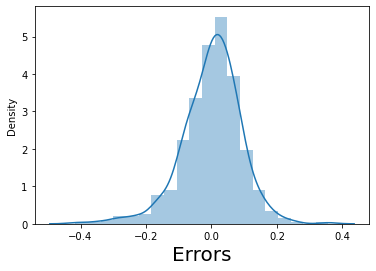

In [95]:
# Plot the distribution plot of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.xlabel('Errors', fontsize = 20)  
plt.show()

## Checking for Hypothesis

#### * We will check if error terms are normally distributed
#### * We will check for Independence of Errors

In [96]:
### taking the independent columns out of the final train data
cols=X_train_rfe_3.columns

In [97]:
## Removing the constant column
X_test=X_test[cols[1:]]

In [98]:
## Adding constant to the test data
X_test_final=sm.add_constant(X_test)

## Making Prediction on test dataset

In [99]:
y_test_pred=mlr_3.predict(X_test_final)

In [100]:
## finding the claues of erros
error=y_test - y_test_pred

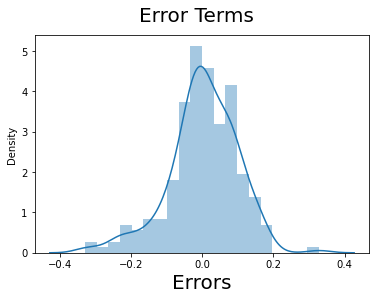

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 20)  
plt.show()

#### Error terms are normally distributed

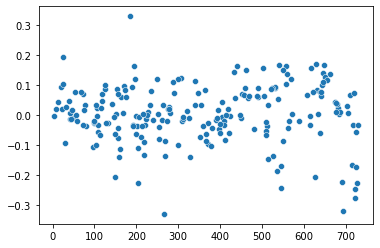

In [102]:
sns.scatterplot(data=error)
plt.show()

#### We can see that there is no pattern in error

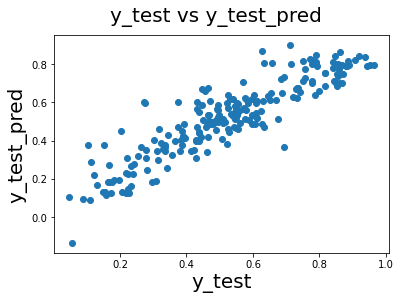

In [103]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_test_pred', fontsize = 20)
plt.show()

## Evaluating Model

In [104]:
## calculating the r2 score
r2_score(y_test, y_test_pred)

0.8049418440982382

In [105]:
mlr_3.params.sort_values(ascending = False)

temp          0.491508
yr            0.233482
const         0.199648
Winter        0.083084
Sep           0.076686
Summer        0.045280
Jul          -0.052418
Spring       -0.066942
Mist         -0.081558
holiday      -0.098013
windspeed    -0.147977
Light_Snow   -0.285155
dtype: float64

## Inferences

#### We can see that top variables that is affecting the demands of the bikes are
* yr (Popularity of the System, more time is spend in the market)
* temp (temp of the day)
* Light_Snow i.e weathersit_3 (3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) is affecting the demand in an inverse manner
* Windspeed is also affecting the demand in an inverse manner

#### Final equation of the best fit line is
__cnt = 0.199648 + 0.491508 * temp + 0.233482 * yr + 0.083084 * Winter + 0.076686 * Sep + 0.045280 * Summer - 0.052418 * Jul - 0.066942 * Spring - 0.081558 * Mist - 0.098013 * holiday - 0.147977 * windspeed - 0.285155 * Light_Snow__